In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

## Rename columns

### Tạo `df` từ `data/nyc_temperatures.csv`

In [5]:
df = pd.read_csv("data/nyc_temperatures.csv")

### In 2 dòng đầu

In [6]:
df.head(2)

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6


#### Đổi tên một số cột
- `value` thành `temp_C`
- `datatype` thành `temp_type`
- In ra 2 dòng đầu


Note: nhớ dùng `inplace`

In [7]:
df.rename(columns={"value": "temp_C", "datatype": "temp_type"}, inplace=True)

In [8]:
df.head(2)

,attributes,temp_type,date,station,temp_C
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6


### Đổi tên tất cả các cột cùng lúc
- Tên các cột mới (theo đúng thứ tự) như sau: `["c1", "c22", "c3", "c4", "c5"]`
- In ra 2 dòng đầu

In [9]:
df.columns = ["attr", "tt", "date", "st", "tc"]

In [10]:
df.head(2)

,attr,tt,date,st,tc
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6


## Đổi `dtype` cột

### Load lại data
- Chạy lại câu lệnh: `df = pd.read_csv('data/nyc_temperatures.csv')`
- In 2 dòng đầu
- In dtypes

In [11]:
df = pd.read_csv('data/nyc_temperatures.csv')

In [12]:
df.head(2)

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6


In [13]:
df.dtypes

attributes     object
datatype       object
date           object
station        object
value         float64
dtype: object

### Đổi cột `date` sang kiểu `datetime`
- Đổi dtype và check lại

In [14]:
df["date"] = pd.to_datetime(df["date"])

In [15]:
df.head(2)

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6


### Đổi cột `value` sang kiểu `str`
- Đổi dtype và check lại

In [16]:
df["value"] = df["value"].astype(str)

In [17]:
df["value"].dtype

dtype('O')

### Đổi ngược lại `value` về kiểu float

In [18]:
df["value"] = df["value"].astype(float)

In [19]:
df["value_int"] = df["value"].apply(lambda x: int(x))

In [20]:
df.head(5)

,attributes,datatype,date,station,value,value_int
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26


In [21]:
df["value"].dtype

dtype('float64')

## `category` type
Lợi ích: 

- đỡ tốn bộ nhớ
- nhanh hơn
- có thể theo thứ tự mong muốn

### Describe cột values

In [22]:
df["value"].describe()

count    93.000000
mean     15.408602
std       6.133703
min       5.600000
25%      10.200000
50%      14.400000
75%      21.100000
max      27.800000
Name: value, dtype: float64

### Tạo cột `temp_rank`
- `value < 10`: `"low"`
- `value >= 10 and value < 20`: `"med"`
- `value >= 20`: `"high"`

In [23]:
df.head(2)

,attributes,datatype,date,station,value,value_int
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25


Cách 1:

In [24]:
df["temp_rank"] = None
df.loc[df["value"] < 10, "temp_rank"] = "low"
df.loc[(df["value"] >= 10) & (df["value"] < 20), "temp_rank"] = "med"
df.loc[df["value"] >= 20, "temp_rank"] = "high"

In [25]:
df["temp_rank"].value_counts()

med     46
high    26
low     21
Name: temp_rank, dtype: int64

In [26]:
df.head(5)

,attributes,datatype,date,station,value,value_int,temp_rank
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,high
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,high
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,med
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,high
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,high


Cách 2: 

In [31]:
def get_temp_rank(x):
    if x < 10:
        return "low"
    elif x < 20:
        return "med"
    else:
        return "high"

In [32]:
df["temp_rank"] = df["value"].apply(lambda x: get_temp_rank(x))

In [33]:
df.head(5)

,attributes,datatype,date,station,value,value_int,temp_rank
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,high
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,high
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,med
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,high
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,high


Cách 3:

#### Trước hết tạo temp_rank dùng pd.cut với 
- `bins=[-np.infty, 10, 20, np.infty]`
- `right=False`

In [35]:
df["temp_rank"] = pd.cut(df["value"], bins=[-np.infty, 10, 20, np.infty], right=False)

In [101]:
df["temp_rank"].value_counts()

[10.0, 20.0)    46
[20.0, inf)     26
[-inf, 10.0)    21
Name: temp_rank, dtype: int64

#### Xem 10 phần tử đầu tiên để double check `temp_rank`

In [103]:
df.head(10)

,attributes,datatype,date,station,value,value_int,temp_rank
0,"H,,S,",TAVG,2018-10-01,GHCND:USW00014732,21.2,21,"[20.0, inf)"
1,",,W,2400",TMAX,2018-10-01,GHCND:USW00014732,25.6,25,"[20.0, inf)"
2,",,W,2400",TMIN,2018-10-01,GHCND:USW00014732,18.3,18,"[10.0, 20.0)"
3,"H,,S,",TAVG,2018-10-02,GHCND:USW00014732,22.7,22,"[20.0, inf)"
4,",,W,2400",TMAX,2018-10-02,GHCND:USW00014732,26.1,26,"[20.0, inf)"
5,",,W,2400",TMIN,2018-10-02,GHCND:USW00014732,19.4,19,"[10.0, 20.0)"
6,"H,,S,",TAVG,2018-10-03,GHCND:USW00014732,21.8,21,"[20.0, inf)"
7,",,W,2400",TMAX,2018-10-03,GHCND:USW00014732,25.0,25,"[20.0, inf)"
8,",,W,2400",TMIN,2018-10-03,GHCND:USW00014732,18.9,18,"[10.0, 20.0)"
9,"H,,S,",TAVG,2018-10-04,GHCND:USW00014732,21.3,21,"[20.0, inf)"


#### Xem dtype của `temp_rank`

In [106]:
df["temp_rank"].dtypes

CategoricalDtype(categories=[[-inf, 10.0), [10.0, 20.0), [20.0, inf)],
              ordered=True)

#### Dùng `pd.cut` nhưng bây giờ thêm `labels=["low", "med", "high"]`

In [37]:
bins = [-np.infty, 10, 20, np.infty]
labels = ["low", "med", "high"]

df["temp_rank"] = pd.cut(df["value"], bins=bins, labels=labels, right=False)

In [38]:
df["temp_rank"].value_counts().sort_index()

low     21
med     46
high    26
Name: temp_rank, dtype: int64

#### Bar plot 

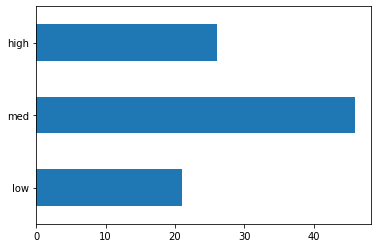

In [45]:
df["temp_rank"].value_counts().sort_index().plot.barh()
plt.show()

## Sort rows

### Load data
- Load: `df = pd.read_csv('data/nyc_temperatures.csv')`
- In ra 5 dòng đầu

In [46]:
df = pd.read_csv('data/nyc_temperatures.csv')

In [47]:
df.head(5)

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
1,",,W,2400",TMAX,2018-10-01T00:00:00,GHCND:USW00014732,25.6
2,",,W,2400",TMIN,2018-10-01T00:00:00,GHCND:USW00014732,18.3
3,"H,,S,",TAVG,2018-10-02T00:00:00,GHCND:USW00014732,22.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1


### Sort theo cột `datatype` (tăng dần)

In [48]:
df.sort_values("datatype")

,attributes,datatype,date,station,value
0,"H,,S,",TAVG,2018-10-01T00:00:00,GHCND:USW00014732,21.2
21,"H,,S,",TAVG,2018-10-08T00:00:00,GHCND:USW00014732,20.9
24,"H,,S,",TAVG,2018-10-09T00:00:00,GHCND:USW00014732,21.8
66,"H,,S,",TAVG,2018-10-23T00:00:00,GHCND:USW00014732,12.6
27,"H,,S,",TAVG,2018-10-10T00:00:00,GHCND:USW00014732,23.8
...,...,...,...,...,...
68,",,W,2400",TMIN,2018-10-23T00:00:00,GHCND:USW00014732,8.3
44,",,W,2400",TMIN,2018-10-15T00:00:00,GHCND:USW00014732,12.8
20,",,W,2400",TMIN,2018-10-07T00:00:00,GHCND:USW00014732,21.1
29,",,W,2400",TMIN,2018-10-10T00:00:00,GHCND:USW00014732,21.7


### Sort theo cột `datatype` (giảm dần)

In [49]:
df.sort_values("datatype", ascending=False) # Descending

,attributes,datatype,date,station,value
92,",,W,2400",TMIN,2018-10-31T00:00:00,GHCND:USW00014732,7.2
32,",,W,2400",TMIN,2018-10-11T00:00:00,GHCND:USW00014732,21.7
71,",,W,2400",TMIN,2018-10-24T00:00:00,GHCND:USW00014732,7.8
47,",,W,2400",TMIN,2018-10-16T00:00:00,GHCND:USW00014732,9.4
68,",,W,2400",TMIN,2018-10-23T00:00:00,GHCND:USW00014732,8.3
...,...,...,...,...,...
66,"H,,S,",TAVG,2018-10-23T00:00:00,GHCND:USW00014732,12.6
27,"H,,S,",TAVG,2018-10-10T00:00:00,GHCND:USW00014732,23.8
69,"H,,S,",TAVG,2018-10-24T00:00:00,GHCND:USW00014732,11.0
48,"H,,S,",TAVG,2018-10-17T00:00:00,GHCND:USW00014732,13.2


### Sort theo `datatype` và `value` (tăng dần)

In [54]:
pd.options.display.max_rows = 200

In [57]:
df.sort_values(["datatype", "value", "date"]).head(2)

,attributes,datatype,date,station,value
75,"H,,S,",TAVG,2018-10-26T00:00:00,GHCND:USW00014732,7.3
63,"H,,S,",TAVG,2018-10-22T00:00:00,GHCND:USW00014732,8.3


### Sort theo `datatype` và `value` (giảm dần)

In [59]:
df.sort_values(["datatype", "value"], ascending=False).head(2)

,attributes,datatype,date,station,value
29,",,W,2400",TMIN,2018-10-10T00:00:00,GHCND:USW00014732,21.7
32,",,W,2400",TMIN,2018-10-11T00:00:00,GHCND:USW00014732,21.7


### Sort theo `datatype` (giảm dần) và `value` (tăng dần)

In [61]:
df.sort_values(["datatype", "value", "date"], ascending=[False, True, False]).head(3)

,attributes,datatype,date,station,value
77,",,W,2400",TMIN,2018-10-26T00:00:00,GHCND:USW00014732,5.6
65,",,W,2400",TMIN,2018-10-22T00:00:00,GHCND:USW00014732,5.6
74,",,W,2400",TMIN,2018-10-25T00:00:00,GHCND:USW00014732,6.1


## Get `n` rows with largest/smallest values by some columns

### Lấy `5` dòng có `value` lớn nhất

In [64]:
df.sort_values("value", ascending=False).head(5)

,attributes,datatype,date,station,value
19,",,W,2400",TMAX,2018-10-07T00:00:00,GHCND:USW00014732,27.8
28,",,W,2400",TMAX,2018-10-10T00:00:00,GHCND:USW00014732,27.8
31,",,W,2400",TMAX,2018-10-11T00:00:00,GHCND:USW00014732,26.7
4,",,W,2400",TMAX,2018-10-02T00:00:00,GHCND:USW00014732,26.1
10,",,W,2400",TMAX,2018-10-04T00:00:00,GHCND:USW00014732,26.1


In [69]:
df["date"] = pd.to_datetime(df["date"])

In [71]:
df.nlargest(5, "date")

,attributes,datatype,date,station,value
90,"H,,S,",TAVG,2018-10-31,GHCND:USW00014732,12.6
91,",,W,2400",TMAX,2018-10-31,GHCND:USW00014732,17.8
92,",,W,2400",TMIN,2018-10-31,GHCND:USW00014732,7.2
87,"H,,S,",TAVG,2018-10-30,GHCND:USW00014732,10.2
88,",,W,2400",TMAX,2018-10-30,GHCND:USW00014732,13.9


### Lấy `5` dòng có `value` nhỏ nhất

In [73]:
df.sort_values("value").head(5)

,attributes,datatype,date,station,value
77,",,W,2400",TMIN,2018-10-26,GHCND:USW00014732,5.6
65,",,W,2400",TMIN,2018-10-22,GHCND:USW00014732,5.6
62,",,W,2400",TMIN,2018-10-21,GHCND:USW00014732,6.1
74,",,W,2400",TMIN,2018-10-25,GHCND:USW00014732,6.1
53,",,W,2400",TMIN,2018-10-18,GHCND:USW00014732,6.7


In [76]:
df.nsmallest(5, ["value", "date"])

,attributes,datatype,date,station,value
65,",,W,2400",TMIN,2018-10-22,GHCND:USW00014732,5.6
77,",,W,2400",TMIN,2018-10-26,GHCND:USW00014732,5.6
62,",,W,2400",TMIN,2018-10-21,GHCND:USW00014732,6.1
74,",,W,2400",TMIN,2018-10-25,GHCND:USW00014732,6.1
53,",,W,2400",TMIN,2018-10-18,GHCND:USW00014732,6.7


## Sort columns

### Tạo `df` từ `data/treatments.csv`

In [78]:
df = pd.read_csv("data/treatments.csv")

In [79]:
df.head()

,id,gender,race,trt,day_01,day_03,day_02
0,1,F,0,0,19.81310,18.05777,14.84996
1,2,M,0,0,17.91846,18.75825,15.30547
2,3,M,0,0,17.22526,19.79218,15.10622


### Sort columns theo thứ tự A-Z

In [87]:
df.sort_index(axis=1, ascending=False)

,trt,race,id,gender,day_03,day_02,day_01
0,0,0,1,F,18.05777,14.84996,19.81310
1,0,0,2,M,18.75825,15.30547,17.91846
2,0,0,3,M,19.79218,15.10622,17.22526


### Tìm cách tối ưu nhất để được data frame gồm `id, race, day1, day2, day3` theo đúng thứ tự
- Nghĩ đến trường hợp `days_xx` có thể rất lớn (VD: 99) và ở thứ tự tùy ý
- Gợi ý: tạo 2 DFs rồi concat với `axis=1`

In [99]:
df01 = df.loc[:, ["id", "race"]]
cols = sorted([x for x in df.columns if x.startswith("day_")])
df02 = df.loc[:, cols]

df03 = pd.concat([df01, df02], axis=1)

In [100]:
df03

,id,race,day_01,day_02,day_03
0,1,0,19.81310,14.84996,18.05777
1,2,0,17.91846,15.30547,18.75825
2,3,0,17.22526,15.10622,19.79218


## Random sampling

In [104]:
df = pd.read_csv("data/stars.csv")

In [105]:
df.shape

(2972, 12)

### Chọn ngẫu nhiên `10` dòng
- Lưu vào `df_smpl`
- In ra shape
- In ra index

Note: thử nghiệm khi không set `random_state`

### Chọn ngẫu nhiên `10%` số dòng

In [116]:
df_smpl = df.sample(frac=0.1, random_state=0) # Reproduce

In [120]:
df02 = df.sample(n=100)

## Reshape data

### Transpose
- Load `pd.read_csv("data/stars.csv")`
- Transpose

In [122]:
df = pd.read_csv("data/stars.csv")

In [123]:
df.head(3)

,magJ,name,radius,spectraltype,magB,magV,temperature,magK,mass,metallicity,magH,planets
0,2.943,11 Com,19.00,G8 III,5.740,4.740,4742.0,2.282,2.7,-0.35,2.484,1.0
1,2.876,11 UMi,24.08,K4III,6.415,5.024,4340.0,1.939,1.8,0.04,2.091,1.0
2,3.019,14 And,11.00,K0III,6.240,5.220,4813.0,2.331,2.2,-0.24,2.608,1.0


### Long vs. Wide

#### Wide format

##### Tạo DF `wide` từ file `data/wide_data.csv`, set `parse_dates=["date"]`

In [130]:
wide = pd.read_csv("data/wide_data.csv")

##### In 3 dòng đầu

In [131]:
wide.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


##### Chạy đoạn code sau

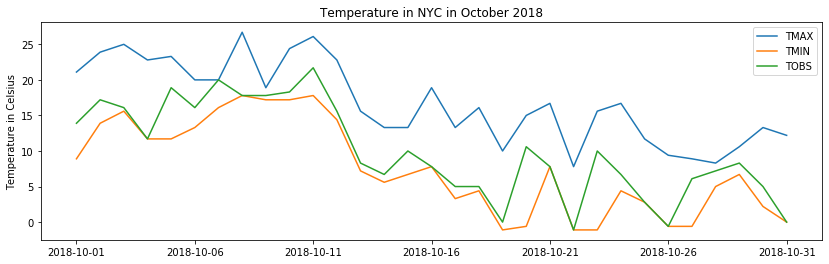

In [132]:
ax = wide.plot(
    x="date", 
    y=["TMAX", "TMIN", "TOBS"],
    figsize=(14, 4)
)

ax.set_title("Temperature in NYC in October 2018")
ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')

plt.show()

#### Long format

##### Tạo DF `long` từ file `data/long_data.csv`, set `parse_dates=["date"]` và `usecols=["date", "datatype", "value"]`

##### In 3 dòng đầu

In [134]:
long = pd.read_csv("data/long_data.csv")

In [135]:
long.head(3)

,attributes,datatype,date,station,value
0,",,H,0700",TMAX,2018-10-01T00:00:00,GHCND:USC00280907,21.1
1,",,H,0700",TMIN,2018-10-01T00:00:00,GHCND:USC00280907,8.9
2,",,H,0700",TOBS,2018-10-01T00:00:00,GHCND:USC00280907,13.9


##### Chạy đoạn code sau

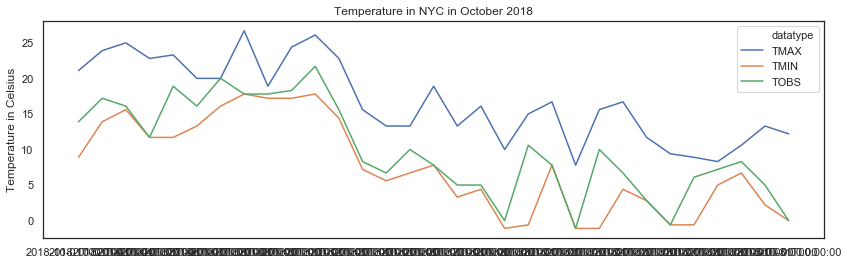

In [136]:
sns.set(
    rc={"figure.figsize": (14, 4)}, 
    style="white"
)

ax = sns.lineplot(
        x="date",
        y="value",
        hue="datatype",
        data=long
    )

ax.set_xlabel(None)
ax.set_ylabel('Temperature in Celsius')
ax.set_title('Temperature in NYC in October 2018')

plt.show()

### Pivoting - đổi data từ long sang wide

#### Tạo df `long` từ `data/long_data_2.csv`

In [137]:
df = pd.read_csv("data/long_data_2.csv")

In [140]:
df.head(6)

,datatype,date,temp_C,temp_F
0,TMAX,2018-10-01,21.1,69.98
1,TMIN,2018-10-01,8.9,48.02
2,TOBS,2018-10-01,13.9,57.02
3,TMAX,2018-10-02,23.9,75.02
4,TMIN,2018-10-02,13.9,57.02
5,TOBS,2018-10-02,17.2,62.96


#### Pivot data sang wide format
- Giữ nguyên cột `date`
- Các unique value của cột `datatype` được trải ra thành các cột tương ứng
- Dùng value của `temp_C` để fill vào các ô (thử với `temp_F`)

In [150]:
df.pivot(index="date", columns="datatype", values="temp_C").head(6)

datatype,TMAX,TMIN,TOBS
date,,,
2018-10-01,21.1,8.9,13.9
2018-10-02,23.9,13.9,17.2
2018-10-03,25.0,15.6,16.1
2018-10-04,22.8,11.7,11.7
2018-10-05,23.3,11.7,18.9
2018-10-06,20.0,13.3,16.1


### Melting - Đổi từ wide sang long

#### Tạo df `wide` từ `data/wide_data.csv`

In [151]:
wide = pd.read_csv("data/wide_data.csv")

In [152]:
wide.head(3)

,date,TMAX,TMIN,TOBS
0,2018-10-01,21.1,8.9,13.9
1,2018-10-02,23.9,13.9,17.2
2,2018-10-03,25.0,15.6,16.1


#### Pivot data sang wide format
- Giữ nguyên cột date
- Gom 3 cột `TMAX`, `TMIN`, `TOBS` thành một cột tên `temp_type`
- Gom các value ở từng ô lại tạo thành cột `value` tương ứng
- Sort `date` để xem kết quả

In [155]:
wide.melt(
    id_vars="date", 
    value_vars=["TMAX", "TMIN", "TOBS"], 
    var_name="temp_type", value_name="temp_value"
).head(3)

,date,temp_type,temp_value
0,2018-10-01,TMAX,21.1
1,2018-10-02,TMAX,23.9
2,2018-10-03,TMAX,25.0


## Handle dirty data

### Tạo `df` từ `data/dirty_data.csv`

In [156]:
df = pd.read_csv("data/dirty_data.csv")

### Summary

#### 5 dòng đầu

In [ ]:
# Missing

In [159]:
np.nan # Educated guess

nan

In [158]:
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


#### Info

In [160]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 765 entries, 0 to 764
Data columns (total 10 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   date               765 non-null    object 
 1   station            765 non-null    object 
 2   PRCP               765 non-null    float64
 3   SNOW               577 non-null    float64
 4   SNWD               577 non-null    float64
 5   TMAX               765 non-null    float64
 6   TMIN               765 non-null    float64
 7   TOBS               398 non-null    float64
 8   WESF               11 non-null     float64
 9   inclement_weather  408 non-null    object 
dtypes: float64(7), object(3)
memory usage: 59.9+ KB


In [161]:
df.shape

(765, 10)

#### Describe text cols

In [162]:
df.describe(include="O")

,date,station,inclement_weather
count,765,765,408
unique,324,2,2
top,2018-07-05T00:00:00,GHCND:USC00280907,False
freq,8,398,384


#### Describe numeric cols

In [164]:
df.describe(include="number")

C:\Users\tue\programs\anaconda3\lib\site-packages\numpy\lib\function_base.py:3942: RuntimeWarning: invalid value encountered in multiply
  x2 = take(ap, indices_above, axis=axis) * weights_above


,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF
count,765.000000,577.000000,577.0,765.000000,765.000000,398.000000,11.000000
mean,5.360392,4.202773,NaN,2649.175294,-15.914379,8.632161,16.290909
std,10.002138,25.086077,NaN,2744.156281,24.242849,9.815054,9.489832
min,0.000000,0.000000,-inf,-11.700000,-40.000000,-16.100000,1.800000
25%,0.000000,0.000000,NaN,13.300000,-40.000000,0.150000,8.600000
50%,0.000000,0.000000,NaN,32.800000,-11.100000,8.300000,19.300000
75%,5.800000,0.000000,NaN,5505.000000,6.700000,18.300000,24.900000
max,61.700000,229.000000,inf,5505.000000,23.900000,26.100000,28.700000


### Find and replace

#### Có dòng nào chứa string rỗng?

Hints:

- Dùng for loop qua các cột
- Với mỗi cột, kiểm tra xem có phần tử nào là `""`
- Nếu có in ra tên cột

In [172]:
df.columns.tolist()

['date',
 'station',
 'PRCP',
 'SNOW',
 'SNWD',
 'TMAX',
 'TMIN',
 'TOBS',
 'WESF',
 'inclement_weather']

In [183]:
for c in df.columns:
    if np.any(df[c] == "?") > 0:
        print(c)

station


In [187]:
df.head(3)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN


In [188]:
for c in ["station", "inclement_weather"]:
    print(df[c].unique())

['?' 'GHCND:USC00280907']
[nan False True]


In [185]:
df.select_dtypes("O").columns

Index(['date', 'station', 'inclement_weather'], dtype='object')

#### Replace `"?"` với `np.nan`
- Replace và double check

In [192]:
df.replace("?", np.nan, inplace=True)

In [193]:
df.head()

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,NaN,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False


#### Replace inf bằng `np.nan`
- Replace và double check

In [195]:
df.replace([-np.inf, np.inf], np.nan, inplace=True)

### Fill NaN
- Giả sử các cột numeric nếu missing thì là 0, hãy fill các cột numeric
- Tuy nhiên giữ nguyên các cột text

Hints:
- Lọc ra các cột số
- Subset những cột này và fill

In [213]:
numeric_cols = df.select_dtypes("number").columns.tolist()
text_cols = df.select_dtypes("O").columns.tolist()

print(numeric_cols)
print(text_cols)

['PRCP', 'SNOW', 'SNWD', 'TMAX', 'TMIN', 'TOBS', 'WESF']
['date', 'station', 'inclement_weather']


In [211]:
# Fill num cols
df.loc[:, numeric_cols] = df.loc[:, numeric_cols].fillna(0)

In [214]:
# Fill text cols
df.loc[:, text_cols] = df.loc[:, text_cols].fillna("Unknown")

### Drop NA

In [217]:
df = pd.read_csv("data/dirty_data.csv")

In [221]:
# df.head(50)

In [224]:
df.head(10)

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
0,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
1,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
2,2018-01-01T00:00:00,?,0.0,0.0,-inf,5505.0,-40.0,NaN,NaN,NaN
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
7,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
8,2018-01-04T00:00:00,?,20.6,229.0,inf,5505.0,-40.0,NaN,19.3,True
9,2018-01-05T00:00:00,?,0.3,NaN,NaN,5505.0,-40.0,NaN,NaN,NaN


In [230]:
df.dropna(subset=["TOBS", "inclement_weather"])

,date,station,PRCP,SNOW,SNWD,TMAX,TMIN,TOBS,WESF,inclement_weather
3,2018-01-02T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-8.3,-16.1,-12.2,NaN,False
4,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
5,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
6,2018-01-03T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,-4.4,-13.9,-13.3,NaN,False
11,2018-01-05T00:00:00,GHCND:USC00280907,14.2,127.0,inf,-4.4,-13.9,-13.9,NaN,True
...,...,...,...,...,...,...,...,...,...,...
752,2018-12-27T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,5.6,-2.2,-1.1,NaN,False
755,2018-12-28T00:00:00,GHCND:USC00280907,11.7,0.0,-inf,6.1,-1.7,5.0,NaN,False
760,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
761,2018-12-31T00:00:00,GHCND:USC00280907,0.0,0.0,-inf,3.3,-3.3,-2.8,NaN,False
